In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
df = pd.read_csv('C:/Users/ragar/Desktop/BridgeLabz_tasks/GenAI/ipl_matches.csv')

In [3]:
df.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,4/9/2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,4/9/2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,4/10/2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,4/11/2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,4/12/2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [4]:
df.shape

(758, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               758 non-null    int64 
 1   season           758 non-null    int64 
 2   city             751 non-null    object
 3   date             758 non-null    object
 4   team1            758 non-null    object
 5   team2            758 non-null    object
 6   toss_winner      758 non-null    object
 7   toss_decision    758 non-null    object
 8   result           758 non-null    object
 9   dl_applied       758 non-null    int64 
 10  winner           754 non-null    object
 11  win_by_runs      758 non-null    int64 
 12  win_by_wickets   758 non-null    int64 
 13  player_of_match  754 non-null    object
 14  venue            758 non-null    object
 15  umpire1          756 non-null    object
 16  umpire2          756 non-null    object
 17  umpire3          120 non-null    ob

In [7]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            638
dtype: int64

In [8]:
df['date'] = pd.to_datetime(df['date'], dayfirst = True, format = 'mixed')

In [9]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            638
dtype: int64

In [10]:
df['city'] = df['city'].fillna('Dubai')

In [11]:
df.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            638
dtype: int64

In [12]:
df['player_of_match'].fillna(df['player_of_match'].mode()[0], inplace=True)

In [13]:
df['umpire1'].fillna(df['umpire1'].mode()[0], inplace=True)
df['umpire2'].fillna(df['umpire2'].mode()[0], inplace=True)

In [14]:
df.drop(columns = ['umpire3'], inplace = True)

In [15]:
df.dropna(axis = 0, inplace = True)

In [16]:
df.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

 1.) How many matches (in total) were played according to the dataset ?

In [17]:
total_matches = df['id'].nunique()
print(f"Total Matches Played: {total_matches}")

Total Matches Played: 754


2.) How many IPL seasons are we analysing?

In [18]:
total_seasons = df['season']. nunique()
print(f"Total IPL seasons: {total_seasons}")

Total IPL seasons: 12


3.) Total number of seasons given in the dataset

In [19]:
print(f"Total number of seasons: {total_seasons}")


Total number of seasons: 12


4.) Which team won by maximum run margin against whom and where and when?

In [29]:

max_run_margin_value = df['win_by_runs'].max()
max_run_margin = df.loc[df['win_by_runs'] == max_run_margin_value, ['winner', 'win_by_runs', 'team2', 'venue', 'date']]

print(max_run_margin)


            winner  win_by_runs             team2             venue       date
43  Mumbai Indians          146  Delhi Daredevils  Feroz Shah Kotla 2017-06-05


5.) Which team won by maximum runs?

In [30]:
max_run_margin_value = df['win_by_runs'].max()
max_run_winner = df.loc[df['win_by_runs'] == max_run_margin_value, 'winner'].values[0]

print(f"Team that won by maximum runs: {max_run_winner}")


Team that won by maximum runs: Mumbai Indians


6.) Which team won by maximum wickets (with least wickets fall) against whom and where and when?

In [28]:
max_wickets_margin = df.loc[df['win_by_wickets'].idxmax(), ['winner', 'win_by_wickets', 'team2', 'venue', 'date']]
print(max_wickets_margin)


winner                             Kolkata Knight Riders
win_by_wickets                                        10
team2                              Kolkata Knight Riders
venue             Saurashtra Cricket Association Stadium
date                                 2017-07-04 00:00:00
Name: 2, dtype: object


7.) Which team won by maximum wickets (with least wickets fall)?

In [31]:
max_wickets_margin_value = df['win_by_wickets'].max()
max_wickets_winner = df.loc[df['win_by_wickets'] == max_wickets_margin_value, 'winner'].values[0]

print(f"Team that won by maximum wickets: {max_wickets_winner}")


Team that won by maximum wickets: Kolkata Knight Riders


8.) Which IPL season consisted the most number of matches played?

In [25]:
most_matches_season = df['season'].value_counts().idxmax()
print(f"Season with most matches: {most_matches_season}")

Season with most matches: 2013


9.) Which team is the most successful IPL team as per the data we have?

In [79]:
most_successful_team = df['winner'].value_counts().idxmax()
print(f"Most successful IPL team: {most_successful_team}")


Most successful IPL team: Mumbai Indians


10.) What is the probability of winning a match if the toss was won?

In [80]:
toss_winners = df[df['toss_winner'] == df['winner']].shape[0]
total_matches = df.shape[0]
probability = toss_winners / total_matches
print(f"Probability of winning a match if the toss was won: {probability:.2f}")

Probability of winning a match if the toss was won: 0.52


11.)Highest wins by teams per season

In [32]:
wins_per_season = df.groupby(['season', 'winner']).size().reset_index(name='wins')
idx = wins_per_season.groupby('season')['wins'].idxmax()
top_wins_per_season = wins_per_season.loc[idx]

print(top_wins_per_season)


    season                 winner  wins
6     2008       Rajasthan Royals    13
10    2009       Delhi Daredevils    10
21    2010         Mumbai Indians    11
24    2011    Chennai Super Kings    11
38    2012  Kolkata Knight Riders    12
47    2013         Mumbai Indians    13
54    2014        Kings XI Punjab    12
60    2015    Chennai Super Kings    10
75    2016    Sunrisers Hyderabad    11
80    2017         Mumbai Indians    12
84    2018    Chennai Super Kings    11
96    2019         Mumbai Indians    11


12.) Top 10 highest MOM winners and maximum MOM

In [82]:
top_mom_winners = df['player_of_match'].value_counts().head(10)
print("Top 10 highest MOM winners:\n", top_mom_winners)


Top 10 highest MOM winners:
 player_of_match
CH Gayle          21
AB de Villiers    21
MS Dhoni          17
RG Sharma         17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: count, dtype: int64


13.) Champions each season

In [33]:
last_matches_per_season = df.groupby('season').tail(1)
champions = last_matches_per_season[['season', 'winner']]

print("Champions each season:\n", champions)


Champions each season:
      season                       winner
116    2008             Rajasthan Royals
173    2009              Deccan Chargers
233    2010          Chennai Super Kings
306    2011          Chennai Super Kings
380    2012        Kolkata Knight Riders
456    2013               Mumbai Indians
516    2014        Kolkata Knight Riders
575    2015               Mumbai Indians
635    2016          Sunrisers Hyderabad
695    2018          Chennai Super Kings
744    2017        Kolkata Knight Riders
757    2019  Royal Challengers Bangalore


14.) Matches in each city

In [84]:
matches_per_city = df['city'].value_counts()
print("Number of matches in each city:\n", matches_per_city)


Number of matches in each city:
 city
Mumbai            101
Kolkata            78
Delhi              73
Hyderabad          64
Bangalore          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cape Town           7
Ranchi              7
Abu Dhabi           7
Cuttack             7
Dubai               7
Port Elizabeth      7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: count, dtype: int64


15.) Number of matches in each venue

In [85]:
matches_per_venue = df['venue'].value_counts()
print("Number of matches in each venue:\n", matches_per_venue)


Number of matches in each venue:
 venue
Eden Gardens                                            78
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   71
Feroz Shah Kotla                                        66
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadiu

In [86]:
summary_stats = df.describe(include='all')
print(summary_stats)

                  id       season    city                           date  \
count     754.000000   754.000000     754                            754   
unique           NaN          NaN      33                            NaN   
top              NaN          NaN  Mumbai                            NaN   
freq             NaN          NaN     101                            NaN   
mean     1810.201592  2013.448276     NaN  2013-10-29 16:08:16.551724288   
min         1.000000  2008.000000     NaN            2008-01-05 00:00:00   
25%       189.250000  2011.000000     NaN            2011-04-16 06:00:00   
50%       378.500000  2013.000000     NaN            2013-06-04 12:00:00   
75%       567.750000  2016.000000     NaN            2016-08-05 00:00:00   
max     11416.000000  2019.000000     NaN            2019-05-12 00:00:00   
std      3485.734268     3.371721     NaN                            NaN   

                 team1                  team2     toss_winner toss_decision  \
count   

Champions In Each Season


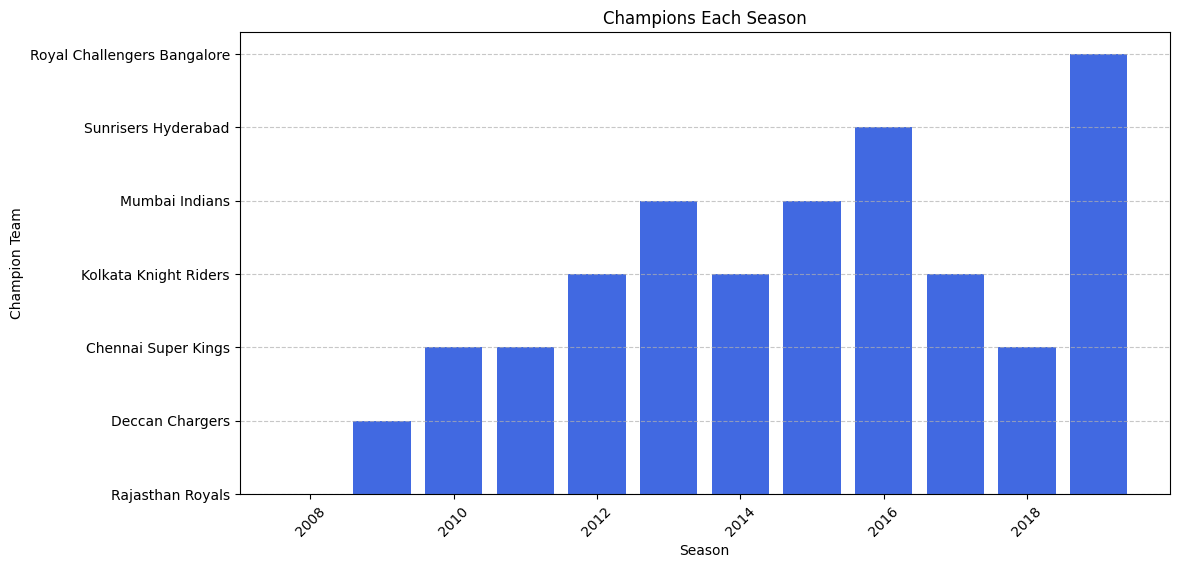

In [87]:
champions_per_season = df.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']]

plt.figure(figsize=(12, 6))
plt.bar(champions_per_season['season'], champions_per_season['winner'], color='royalblue')
plt.title('Champions Each Season')
plt.xlabel('Season')
plt.ylabel('Champion Team')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Plotting the number of matches played per season

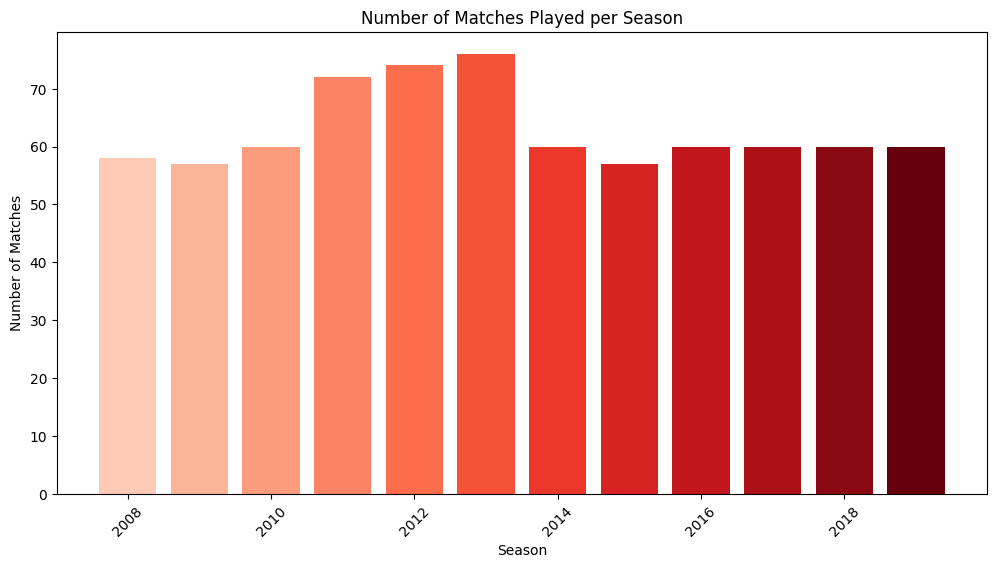

In [88]:
matches_per_season = df['season'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(matches_per_season.index, matches_per_season.values, color = plt.cm.Reds(np.linspace(0.2, 1, len(matches_per_season))))
plt.title('Number of Matches Played per Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()


Plotting the number of matches played in each city

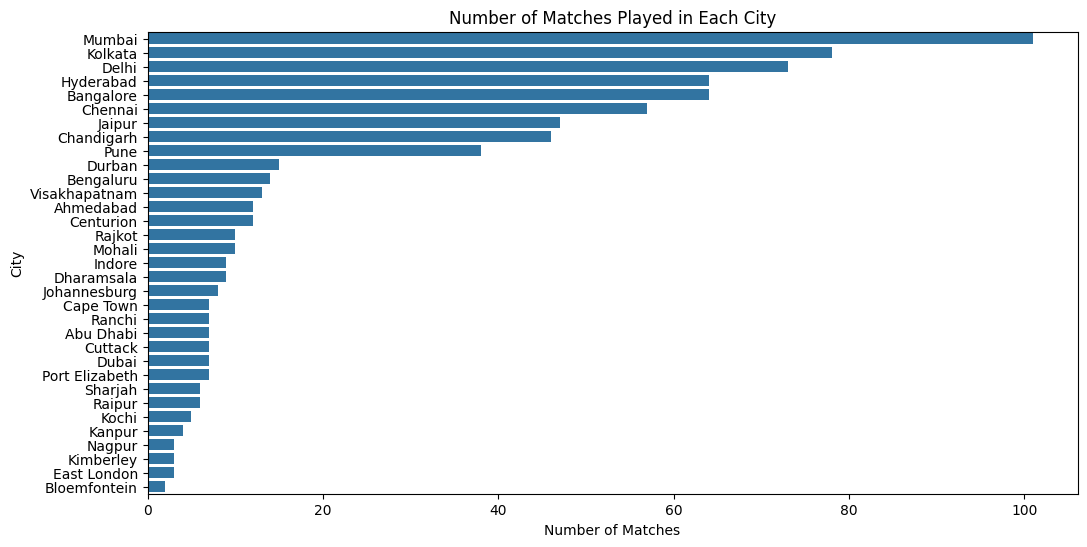

In [89]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='city', order=df['city'].value_counts().index)
plt.title('Number of Matches Played in Each City')
plt.xlabel('Number of Matches')
plt.ylabel('City')
plt.show()

Plotting the most successful teams

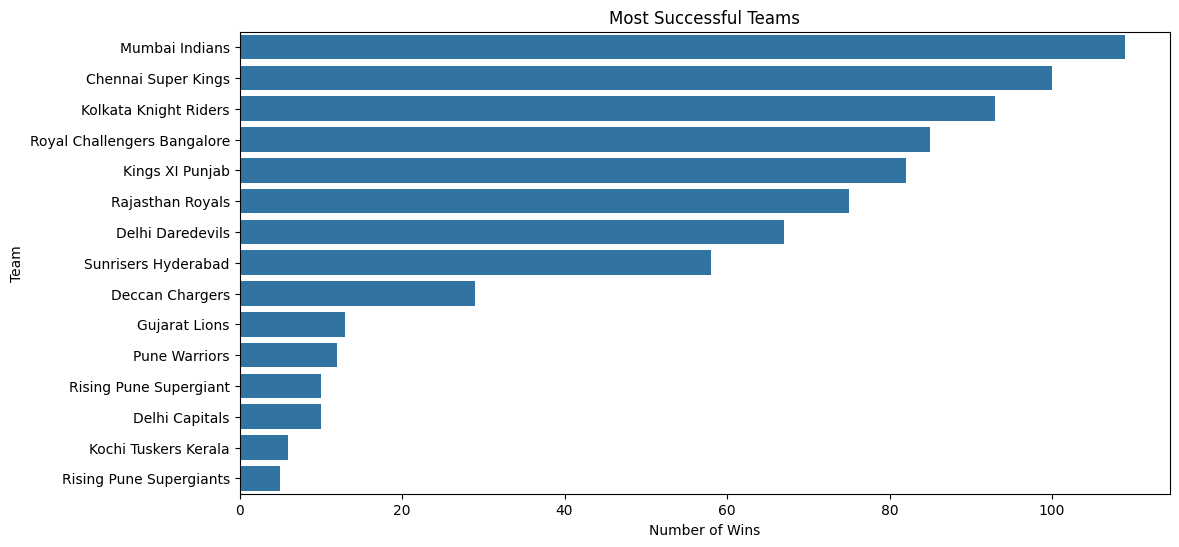

In [90]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='winner', order=df['winner'].value_counts().index)
plt.title('Most Successful Teams')
plt.xlabel('Number of Wins')
plt.ylabel('Team')
plt.show()

Plotting the top 10 highest MOM winners

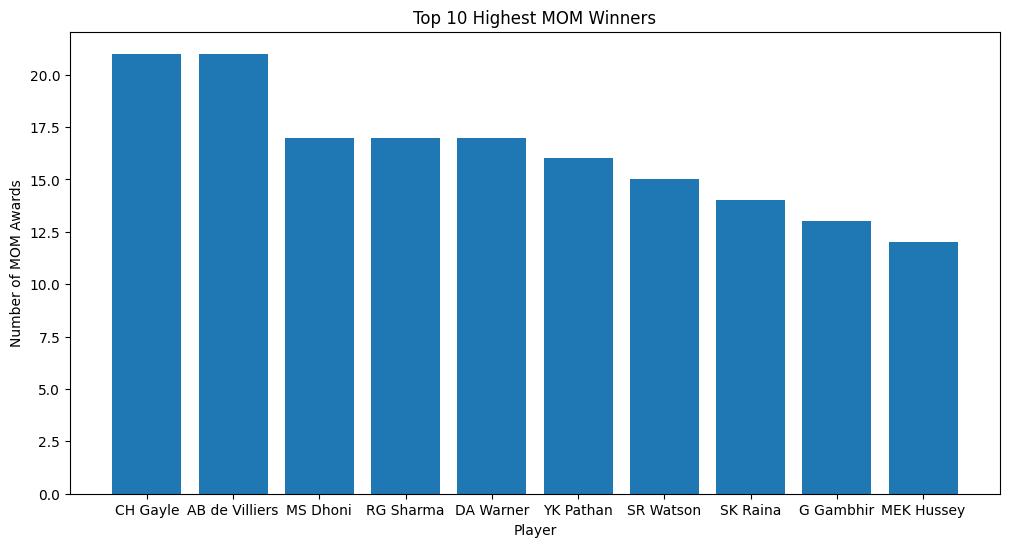

In [91]:
plt.figure(figsize=(12, 6))
plt.bar(top_mom_winners.index, top_mom_winners.values)
plt.title('Top 10 Highest MOM Winners')
plt.xlabel('Player')
plt.ylabel('Number of MOM Awards')
plt.show()